Does the China's Non-recyclable Waste Plastic Ban Worked?
=======

**INTRODUCTION**

Last time, we checked out the effect of China's Non-recyclable Waste Plastic (NRWP) Ban to other countries. Through the whole process, we finally got to know Thailand and Indonesia's NRWP amount had been increased.
In this section, let's check out the ban's effectiveness was whether feasible or non-feasible with T-test method.

For the T-test, I had to gather other dataset from UN Comtrade. Before touting myself, I want to show the new dataset for this analysis.

<br/>
<br/>

**NEW DATASET WELCOMING**
1. Thailand Case
 - **_16-18 Thailand Waste Plastic.csv_** : This data contains Thailand's waste plastic trade information: Import, Export, Re-Import, Re-Export with several countries. However, we just need Import data. And then, we are going to extract NRWP import data by countries in 2018.
 - **_thai 1116 import refined.csv_** : This data contains Thailand's waste plastic import information from several countries from 2011 to 2016. I refined the data for T-test, so it just has 'Netweight (kg)' columns.


2. Indonesia Case
 - **_16-18 Indonesia Waste Plastic.csv_** : Same as Thailand's case.
 - **_indo 1116 import refined.csv_** : Same as Thailand's case.

<br/>
<br/>

**HYPOTHESIS**
1. H0 : The two import amounts don't have any difference.
2. H1 : The two import amounts have some differences.

In [215]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
# Let's import '16-18_Thailand Waste Plastic.csv' to extract Thailand's import data in 2018 
# and check it if the data is correct.
thai2018_import = pd.read_csv('Capstone 2/16-18_Thailand Waste Plastic.csv')
thai2018_import = thai2018_import[(thai2018_import['Year'] == 2018) & (thai2018_import['Trade Flow'] == 'Import')
                                 & (thai2018_import['Partner'] != 'World')]
thai2018_import.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit,Netweight (kg),Trade Value (US$)
4,H5,2018,2018,2018,4,0,1,Import,764,Thailand,...,Argentina,ARG,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,48485,48485,4689
5,H5,2018,2018,2018,4,0,1,Import,764,Thailand,...,Australia,AUS,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,23405132,23405132,4037317
7,H5,2018,2018,2018,4,0,1,Import,764,Thailand,...,Austria,AUT,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,37380,37380,3525
9,H5,2018,2018,2018,4,0,1,Import,764,Thailand,...,Bahrain,BHR,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,26000,26000,2547
11,H5,2018,2018,2018,4,0,1,Import,764,Thailand,...,Bangladesh,BGD,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,299492,299492,30217


In [217]:
# Let the 'thai2018_import' dataframe to be a brief dataframe to make it easier to test
thai2018_import['Netweight (Ton)'] = thai2018_import['Netweight (kg)'] / 1000
thai2018_import['Netweight (Ton)'] = thai2018_import['Netweight (Ton)'].astype(int)
thai2018_import.drop('Netweight (kg)', axis=1)
thai2018_import = thai2018_import['Netweight (Ton)']
thai2018_import = pd.DataFrame(thai2018_import)
thai2018_import.to_csv('Capstone 2/thai2018_import.csv')

Until now on, it worked well. <br/>
From now, let's extract Thailand import data from 2011 to 2016 from naive UN comtrade data which already downloaded.

In [218]:
# Read 2011~2015 data first and merge with 2016 data, 
# because I only can download 5 years data at one time on website.
thai_1115 = pd.read_csv('Capstone 2/thai_comtrade.csv')
thai_16 = pd.read_csv('Capstone 2/thai_comtrade (1).csv')
thai_1116 = thai_1115.append(thai_16)
thai_1116_import = thai_1116[(thai_1116['Trade Flow'] == 'Import') & (thai_1116['Partner'] != 'World')]
thai_1116_import = thai_1116_import.sort_values(by='Year', ascending=True)
thai_1116_import['Netweight (Ton)'] = thai_1116_import['Netweight (kg)'] / 1000
thai_1116_import['Netweight (Ton)'] = thai_1116_import['Netweight (Ton)'].astype(int)
thai_1116_import.drop('Netweight (kg)', axis=1)
thai_1116_import = thai_1116_import['Netweight (Ton)']
thai_1116_import = pd.DataFrame(thai_1116_import)
thai_1116_import.to_csv('Capstone 2/thai_1116_import.csv')

Until now, we refined 2011~2016 and 2018 NRWP import trade data. Now, let's figure out the data are in normal distribution for using T-test method.  
Let's see some statistical imformation with **describe()** syntax and the histogram respectively.

In [219]:
thai_1116_import.describe()

,Netweight (Ton)
count,488.000000
mean,1260.678279
std,2837.210394
min,0.000000
25%,33.000000
50%,200.000000
75%,987.000000
max,23755.000000


In [220]:
thai2018_import.describe()

,Netweight (Ton)
count,172.000000
mean,6426.593023
std,23557.859359
min,0.000000
25%,56.000000
50%,229.000000
75%,2062.500000
max,188237.000000


Humm, both standard deviations are way too big for normal distribution. Now, let's check the histogram visually.

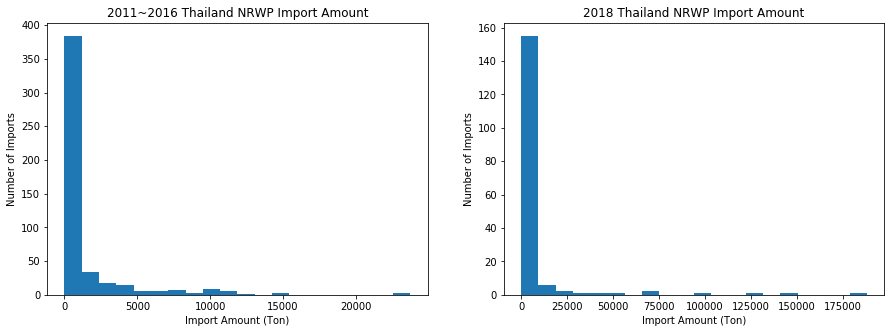

In [221]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
weight_1116_import = np.array(thai_1116_import['Netweight (Ton)'])
plt.hist(weight_1116_import, bins=20)
plt.xlabel('Import Amount (Ton)')
plt.ylabel('Number of Imports')
plt.title('2011~2016 Thailand NRWP Import Amount')

plt.subplot(1,2,2)
weight_2018_import = np.array(thai2018_import['Netweight (Ton)'])
plt.hist(weight_2018_import, bins=20)
plt.xlabel('Import Amount (Ton)')
plt.ylabel('Number of Imports')
plt.title('2018 Thailand NRWP Import Amount')
plt.show()

We are able to know definately that those data are in non-normal distribution.  
Then we should use Mann Whithney U test for this case. Let's see how it looks like.

In [222]:
stats.mannwhitneyu(thai2018_import, thai_1116_import)

MannwhitneyuResult(statistic=36767.0, pvalue=0.0077853048375385045)

In this case, the P-value is under 0.05.  
This means that for the Thailand case, null-hypothesis is rejected at the 5% level of significance.

<br/>

Now, let's looking into Indonesia case in the same way of Thailand's

In [223]:
# Let's import '16-18_Indonesia Waste Plastic.csv' to extract Indonesia's import data in 2018 
# and check it if the data is correct.
indo_2018 = pd.read_csv('Capstone 2/16-18_Indonesia Waste Plastic.csv')
indo_2018_import = indo_2018[(indo_2018['Trade Flow']=='Import') & (indo_2018['Partner'] != 'World')]
indo_2018_import.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit,Netweight (kg),Trade Value (US$)
2,H5,2018,2018,2018,4,0,1,Import,360,Indonesia,...,Australia,AUS,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,18638694,18638694,7353815
5,H5,2018,2018,2018,4,0,1,Import,360,Indonesia,...,Belgium,BEL,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,8262372,8262372,1826262
9,H5,2018,2018,2018,4,0,1,Import,360,Indonesia,...,Canada,CAN,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,3304643,3304643,512127
11,H5,2018,2018,2018,4,0,1,Import,360,Indonesia,...,Chile,CHL,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,17870,17870,8935
12,H5,2018,2018,2018,4,0,1,Import,360,Indonesia,...,China,CHN,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,1747414,1747414,1031467


Keep going to make the dataframe simple.

In [224]:
indo_2018_import = pd.DataFrame(indo_2018_import['Netweight (kg)'])
indo_2018_import['Netweight (Ton)'] = indo_2018_import / 1000
indo_2018_import['Netweight (Ton)'].astype(int)
indo_2018_import = indo_2018_import.drop('Netweight (kg)', axis=1)

Let's extract Indonesia import data from 2011 to 2016 from naive UN comtrade data which already downloaded.  
I am going to merge two data sets because as I mentioned above, I only can download 5 years data at one time.

In [225]:
# Import data and merge it then check it went well.
indo1115 = pd.read_csv('Capstone 2/indo_comtrade.csv')
indo16 = pd.read_csv('Capstone 2/indo_comtrade (1).csv')
indo1116 = indo1115.append(indo16)
indo1116.sort_values(by='Year', ascending=False).head()

,Year,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit,Netweight (kg),Trade Value (US$)
178,2016,Export,360,Indonesia,IDN,842,USA,USA,391590,"Plastics n.e.c. in heading no. 3915; waste, pa...",8,Weight in kilograms,NaN,433,433,1003
66,2016,Import,360,Indonesia,IDN,826,United Kingdom,GBR,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,3848013,3848013,495592
64,2016,Export,360,Indonesia,IDN,784,United Arab Emirates,ARE,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,48995,48995,7362
63,2016,Import,360,Indonesia,IDN,784,United Arab Emirates,ARE,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,135090,135090,40527
62,2016,Export,360,Indonesia,IDN,764,Thailand,THA,3915,"Waste, parings and scrap, of plastics",8,Weight in kilograms,NaN,146660,146660,48783


Let's make the dataset as simple as possible.

In [226]:
indo1116_import = indo1116[(indo1116['Trade Flow']=='Import') & (indo1116['Partner'] != 'World')]
indo1116_import = pd.DataFrame(indo1116_import['Netweight (kg)'])
indo1116_import['Netweight (Ton)'] = indo1116_import / 1000
indo1116_import['Netweight (Ton)'].astype(int)
indo1116_import = indo1116_import.drop('Netweight (kg)', axis=1)

Now, let's figure out the data are in normal distribution as we did above.  
And then let's see some statistical imformation with **describe()** syntax and the histogram respectively.

In [227]:
indo1116_import.describe()

,Netweight (Ton)
count,553.000000
mean,2383.617280
std,7832.545393
min,0.001000
25%,45.560000
50%,174.939000
75%,868.452000
max,55123.035000


In [228]:
indo_2018_import.describe()

,Netweight (Ton)
count,201.000000
mean,4392.344945
std,12868.404032
min,0.001000
25%,39.147000
50%,208.352000
75%,1845.770000
max,92682.400000


Okay, it is not suprising that the standard deviation is too much high.  
Let's see histograms for better understadning.

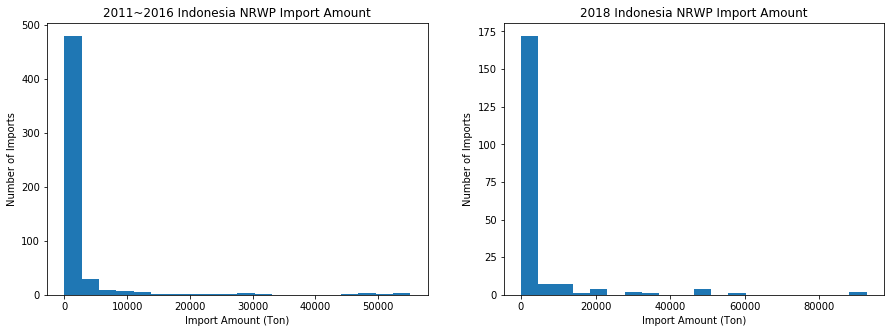

In [229]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
indo_weight1116_import = np.array(indo1116_import['Netweight (Ton)'])
plt.hist(indo_weight1116_import, bins=20)
plt.xlabel('Import Amount (Ton)')
plt.ylabel('Number of Imports')
plt.title('2011~2016 Indonesia NRWP Import Amount')

plt.subplot(1,2,2)
indo_weight18_import = np.array(indo_2018_import['Netweight (Ton)'])
plt.hist(indo_weight18_import, bins=20)
plt.xlabel('Import Amount (Ton)')
plt.ylabel('Number of Imports')
plt.title('2018 Indonesia NRWP Import Amount')
plt.show()

The same distribution as we saw in Thailand case.
Let's use Mann Whitney U test for this case either.

In [230]:
stats.mannwhitneyu(indo_2018_import, indo1116_import)

MannwhitneyuResult(statistic=53814.5, pvalue=0.2526730928402142)

Oh! Surprisingly, For Indonesia case, null-hypothesis is **not** rejected at the 5% level of significance.  
It means that the data between 2011~2016 things and 2018 data don't have any signficant difference.

**CONCLUSION**

As the extension of Capstone 1, we have checked the impact of China's ban on NRWP for other countries, Thailand and Indonesia. The Mann Whitney U test results of both countries show different.  

In Thailand case, the null-hypothesis (The two import amounts don't have any difference.) is rejected at the 5% level of significances.  
However, in Indonesia case, the null-hypothesis is **not** rejected at the 5% level of significances.